In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("BankData.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [50]:
df.shape

(10127, 21)

In [51]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# Analisis de Datos

In [52]:
def plotColumn_vrs_Target(df, colname, target):
    plt.figure(figsize=(10, 5))
    plot = sns.countplot(x=df[colname], hue=df[target])
    plt.title(colname)
    for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 3, p.get_height() + 50))
    plt.show()

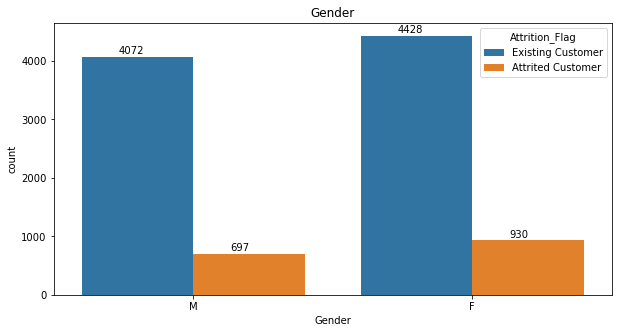

In [53]:
plotColumn_vrs_Target(df, "Gender", "Attrition_Flag")

In [54]:
categorical = []
discrete = []
continues = []

explicatory_vars=list(df.columns)
explicatory_vars.remove("CLIENTNUM")
explicatory_vars.remove("Attrition_Flag")
explicatory_vars

for colName in explicatory_vars:
    if(df[colName].dtype == "object"):
        categorical.append(colName)
    else: 
        if((df[colName].dtype in ["int64", "float64"] )and (len(df[colName].unique()) <= 30)):
            discrete.append(colName)
        else:
            continues.append(colName)

categorical_and_discrete = categorical + discrete

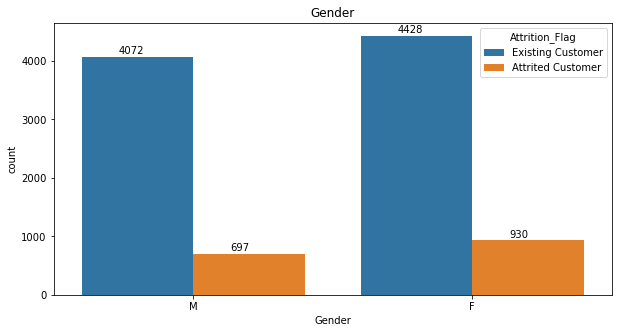

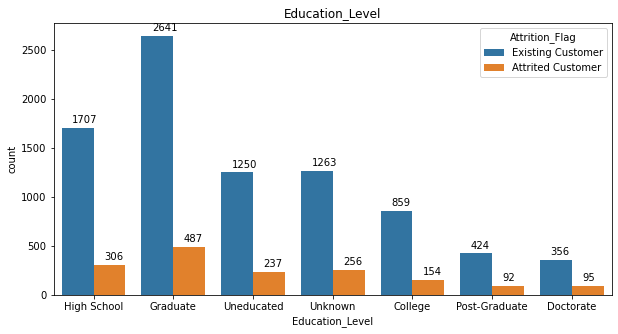

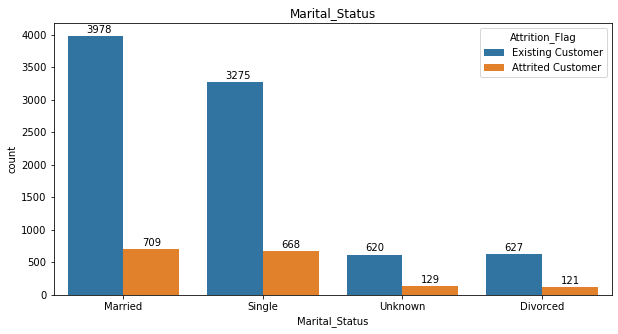

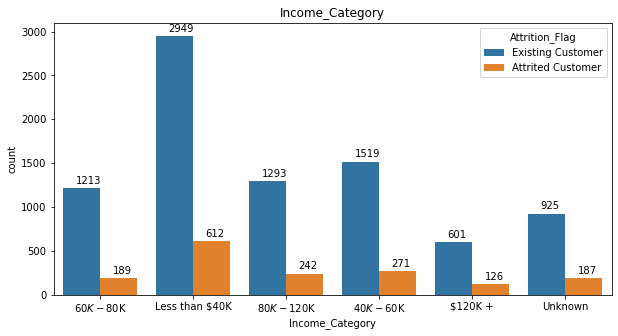

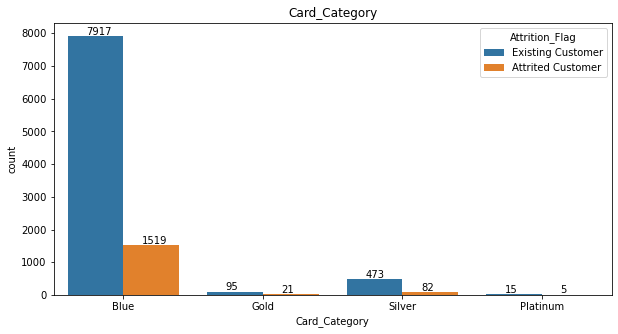

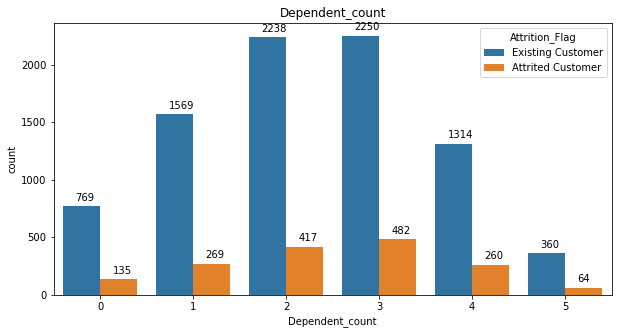

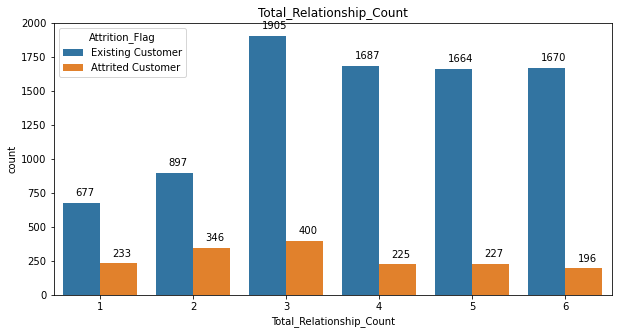

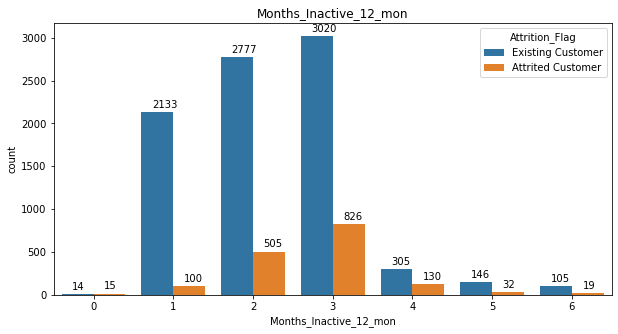

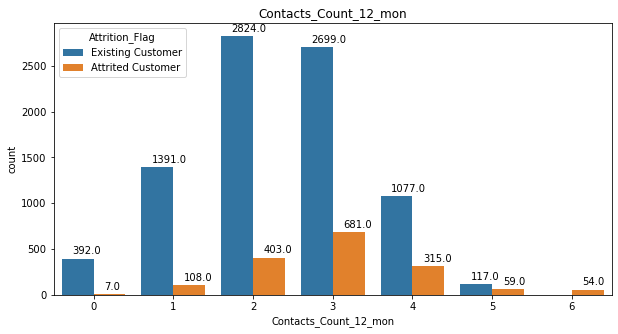

In [55]:
for colname in categorical_and_discrete:
    print("\n\n")
    plotColumn_vrs_Target(df,colname,"Attrition_Flag")

## Boxplots para variables continuas

In [56]:
continues

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Customer_Age


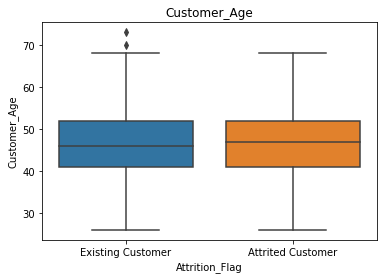

Months_on_book


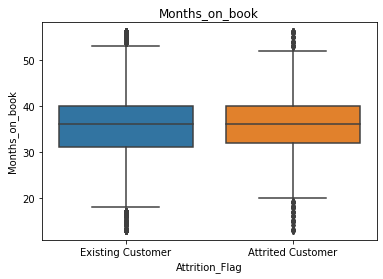

Credit_Limit


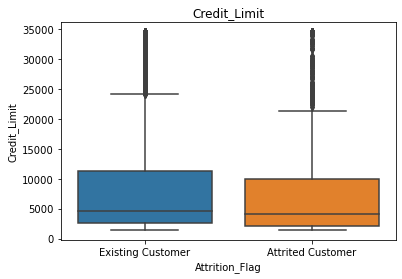

Total_Revolving_Bal


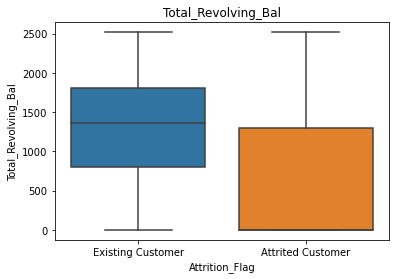

Avg_Open_To_Buy


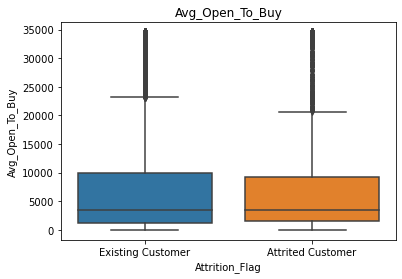

Total_Amt_Chng_Q4_Q1


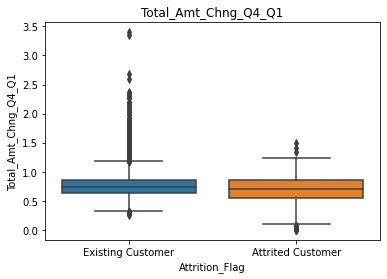

Total_Trans_Amt


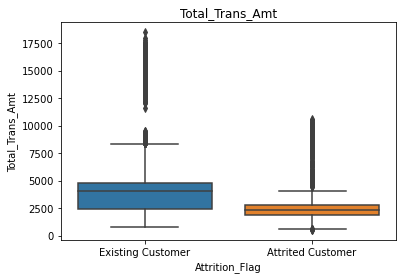

Total_Trans_Ct


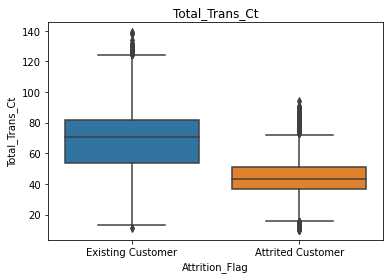

Total_Ct_Chng_Q4_Q1


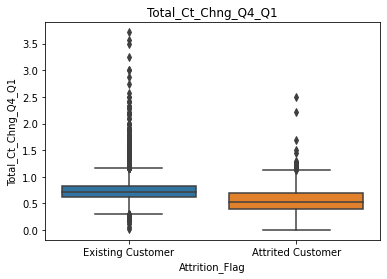

Avg_Utilization_Ratio


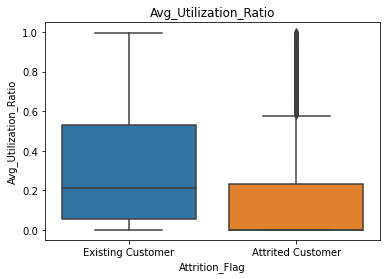

In [57]:
for colName in continues:
    print(colName)
    sns.boxplot(x=df["Attrition_Flag"], y=df[colName])
    plt.title(colName)
    plt.show()

## Construccion de Modelo

## 1.Balanceo de Datos

In [58]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [59]:
df_attrited=df[df["Attrition_Flag"]=="Attrited Customer"]
df_attrited.shape

(1627, 21)

In [60]:
df_existing=df[df["Attrition_Flag"]=="Existing Customer"]
df_existing.shape

(8500, 21)

In [61]:
cantidadExisting=2*df_attrited.shape[0]
cantidadExisting

3254

In [62]:
df_existing=df_existing.sample(n=cantidadExisting, random_state=2023)

In [63]:
df=pd.concat([df_attrited,df_existing])
df.shape

(4881, 21)

## 1.Ingenieria de Caracteristicas

### 2.1 Imputacion de Variables


In [64]:
df.isnull().mean()

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### 2.2 Codificacion de Variables Categoricas

In [65]:
df["Gender"].value_counts()

F    2604
M    2277
Name: Gender, dtype: int64

#### Codificacion de Columna Grande

In [66]:
ohe_gender = pd.get_dummies(df["Gender"], drop_first=True)
df["Gender"] = ohe_gender
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,0,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,0,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,0,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,1,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,1,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


#### Codificacion para el resto de variables

In [67]:
for colName in categorical:
    dict_for_encode = df[colName].value_counts().to_dict()
    df[colName]=df[colName].map(dict_for_encode)

df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,2604,0,1498,2208,1713,4548,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,2604,0,245,2208,540,4548,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,2604,1,1498,2208,1713,4548,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,2277,2,1498,2208,369,4548,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,2277,2,1498,2208,646,265,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [68]:
df["Attrition_Flag"] = pd.get_dummies(df["Attrition_Flag"], drop_first=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,0,62,2604,0,1498,2208,1713,4548,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,0,66,2604,0,245,2208,540,4548,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,0,54,2604,1,1498,2208,1713,4548,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,0,56,2277,2,1498,2208,369,4548,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,0,48,2277,2,1498,2208,646,265,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


## 3. Construccion de Modelos

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression


In [70]:
X=df.drop(["Attrition_Flag", "CLIENTNUM"], axis=1)
y=df["Attrition_Flag"]

In [71]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, shuffle=True,random_state=2023)

#### Escalado de variables


In [72]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)


#### Regresion Logistica

In [73]:
logit= LogisticRegression()
logit.fit(X_train_std, y_train)

logit_predicts=logit.predict(X_test_std)
logit_predicts

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [74]:
print(f"Accuracy: {round(accuracy_score(y_test,logit_predicts),4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test,logit_predicts),4)}")

Accuracy: 0.871
ROC-AUC: 0.8491


In [75]:
print("Matriz de Confusion: \n\n", pd.crosstab (y_test, logit_predicts, rownames=["Observación"], colnames=["Predicción"]))

Matriz de Confusion: 

 Predicción     0    1
Observación          
0            377  103
1             86  899


# Laboratorio 4

# GridSearch Automatico

In [76]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [77]:
SVM = SVC()
hyperparams_grid = {
    "C": [1, 10, 100],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["rbf"],
}

grid_search = GridSearchCV(
    estimator=SVM,
    param_grid=hyperparams_grid,
    n_jobs=1,
    refit="roc_auc",
    scoring=["roc_auc", "accuracy"],
    cv=KFold(n_splits=10, shuffle=True, random_state=2025),
)
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_["mean_test_accuracy"]
roc_aucs = grid_search.cv_results_["mean_test_roc_auc"]

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Mean roc_auc: {roc_aucs.mean()}")

Mejores Hiper-parametros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Metricas: 0.9651802723456318
Mean Accuracy: 0.8234489776085702
Mean roc_auc: 0.9309779775251076


In [78]:
KNN = KNeighborsClassifier()
hyperparams_grid = {
    "leaf_size": [5,6,7,8],
    "n_neighbors": [27,28,29],
    "p": [1, 2, 3],
}

grid_search = GridSearchCV(
    estimator=KNN,
    param_grid=hyperparams_grid,
    n_jobs=1,
    refit="roc_auc",
    scoring=["roc_auc", "accuracy"],
    cv=KFold(n_splits=10, shuffle=True, random_state=2025),
)
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_["mean_test_accuracy"]
roc_aucs = grid_search.cv_results_["mean_test_roc_auc"]

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Mean roc_auc: {roc_aucs.mean()}")

Mejores Hiper-parametros: {'leaf_size': 5, 'n_neighbors': 27, 'p': 1}
Metricas: 0.9473924624264939
Mean Accuracy: 0.8550587939382505
Mean roc_auc: 0.9281837407783539


In [79]:
GNB = GaussianNB()
hyperparams_grid = {
    "var_smoothing": [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
}

grid_search = GridSearchCV(
    estimator=GNB,
    param_grid=hyperparams_grid,
    n_jobs=1,
    refit="roc_auc",
    scoring=["roc_auc", "accuracy"],
    cv=KFold(n_splits=10, shuffle=True, random_state=2025),
)
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_["mean_test_accuracy"]
roc_aucs = grid_search.cv_results_["mean_test_roc_auc"]

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Mean roc_auc: {roc_aucs.mean()}")

Mejores Hiper-parametros: {'var_smoothing': 1e-05}
Metricas: 0.869787458773953
Mean Accuracy: 0.8190958824235564
Mean roc_auc: 0.869787458773953


In [80]:
LDA = LinearDiscriminantAnalysis()
hyperparams_grid = {
    "tol": [1.0e-4, 1.0e-3, 1.0e-5],
    "store_covariance": [True, False]
}

grid_search = GridSearchCV(
    estimator=LDA,
    param_grid=hyperparams_grid,
    n_jobs=1,
    refit="roc_auc",
    scoring=["roc_auc", "accuracy"],
    cv=KFold(n_splits=10, shuffle=True, random_state=2025),
)
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_["mean_test_accuracy"]
roc_aucs = grid_search.cv_results_["mean_test_roc_auc"]

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Mean roc_auc: {roc_aucs.mean()}")

Mejores Hiper-parametros: {'store_covariance': True, 'tol': 0.0001}
Metricas: 0.9222003692075637
Mean Accuracy: 0.8583200425305687
Mean roc_auc: 0.9222003692075637


In [81]:
QDA = QuadraticDiscriminantAnalysis()
hyperparams_grid = {
    'store_covariance':[True, False]
}

grid_search = GridSearchCV(
    estimator=QDA,
    param_grid=hyperparams_grid,
    n_jobs=1,
    refit="roc_auc",
    scoring=["roc_auc", "accuracy"],
    cv=KFold(n_splits=10, shuffle=True, random_state=2025),
)
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_["mean_test_accuracy"]
roc_aucs = grid_search.cv_results_["mean_test_roc_auc"]

print(f"Mejores Hiper-parametros: {grid_search.best_params_}")
print(f"Metricas: {grid_search.best_score_}")
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Mean roc_auc: {roc_aucs.mean()}")

c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Innovacion\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\U

Mejores Hiper-parametros: {'store_covariance': True}
Metricas: 0.9079368524135593
Mean Accuracy: 0.8366714685050848
Mean roc_auc: 0.9079368524135593
